# Pontryagin Leg Testing

## Resources

In [1]:
import PyKEP as pk
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

## Leg Construction Arguments

In [2]:
# spacecraft
sc = pk.sims_flanagan.spacecraft(1000, 0.3, 2500)

# departure time
t0 = pk.epoch(0)

# departure state
p0 = pk.planet.jpl_lp("earth")
r0, v0 = p0.eph(t0)
x0 = pk.sims_flanagan.sc_state(r0, v0, sc.mass)

# departure costates
l0 = np.random.randn(7)

# arrival time
tf = pk.epoch(1000)

# arrival state
pf = pk.planet.jpl_lp("mars")
rf, vf = pf.eph(tf)
xf = pk.sims_flanagan.sc_state(rf, vf, sc.mass/10)
# NOTE: final mass is redundant if freemass == True

# gravitational parametre
mu = pk.MU_SUN

## Unbounded Quadratic Control

In [3]:
leg0 = pk.pontryagin.leg(t0, x0, l0, tf, xf, alpha=0, bound=True)
leg1 = pk.pontryagin.leg(alpha=0, bound=True)
leg1.set(t0, x0, l0, tf, xf)

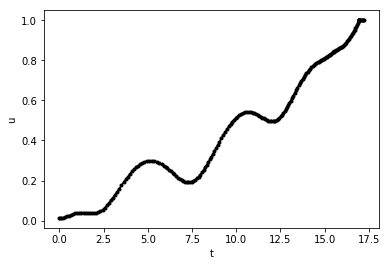

In [4]:
leg0.plot('t', 'u', xlabel=True, ylabel=True)

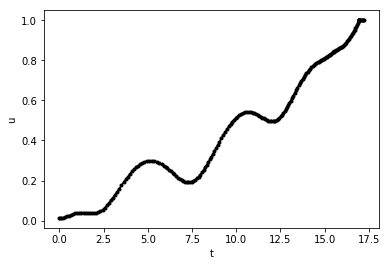

In [5]:
leg1.plot('t', 'u', xlabel=True, ylabel=True)

In [26]:
leg1.trajectory[0, 7:14]

array([-1.83245832, -0.2327916 , -0.13799721, -0.28697346,  1.28987879,
       -0.4255373 , -0.69893231])